# **Data Collection & Data Cleaning**

## Load Dataset

In [1]:
# Import Libaries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Data Science\Capstone Project\Capstone Project 3\bike_sharing\data\raw\data_bike_sharing.csv')

## Data Understanding

In [3]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
display(df.describe(), df.describe(include='object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2012-03-02
freq,22


## Data Cleaning

### Data Type Conversion

In [6]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
df = df.rename(columns={'dteday': 'date','weathersit': 'weather','atemp':'feeling_temp', 'hum': 'humidity','hr':'hour', 'cnt': 'count'})

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_of_week

df = df.drop(['date','casual','registered'], axis=1)

In [9]:
print('df shape:', df.shape, '\n')
print('df Info:',df.info())

df shape: (12165, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humidity      12165 non-null  float64
 1   weather       12165 non-null  int64  
 2   holiday       12165 non-null  int64  
 3   season        12165 non-null  int64  
 4   feeling_temp  12165 non-null  float64
 5   temp          12165 non-null  float64
 6   hour          12165 non-null  int64  
 7   count         12165 non-null  int64  
 8   year          12165 non-null  int32  
 9   month         12165 non-null  int32  
 10  day           12165 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 903.0 KB
df Info: None


### Missing Value

In [10]:
print('Total number of missing values:', df.isnull().sum().sum())

Total number of missing values: 0


### Duplicated Data

In [11]:
print('Total number of duplicated rows:', df.duplicated().sum())

Total number of duplicated rows: 1


In [12]:
df[df.duplicated()]

,humidity,weather,holiday,season,feeling_temp,temp,hour,count,year,month,day
7731,0.65,1,0,4,0.2576,0.24,6,11,2011,12,5


In [13]:
df = df.drop_duplicates()

### Data Distribution and Outlier

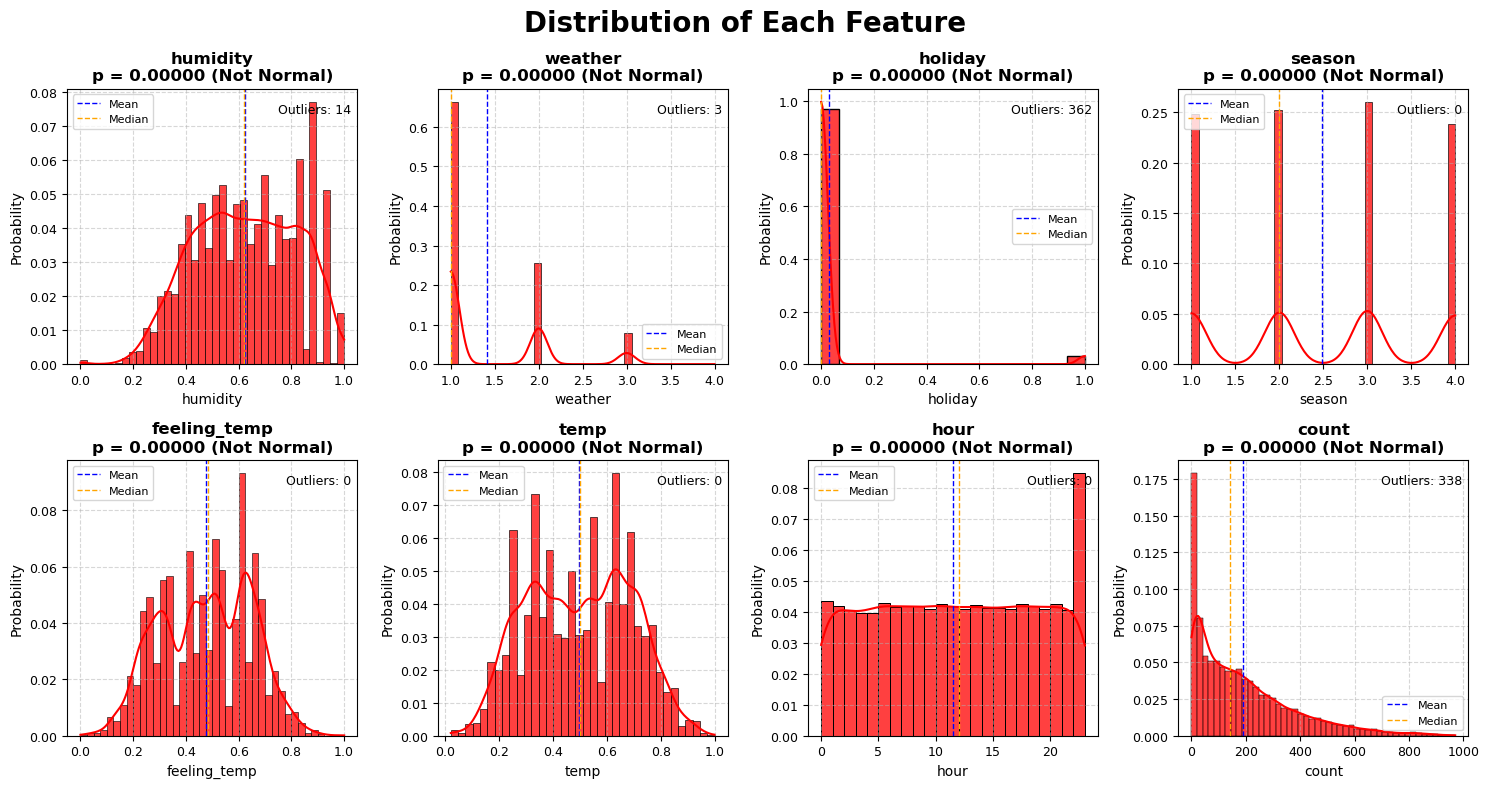

In [14]:
from scipy.stats import normaltest

# Select numerical features
num_features = df.select_dtypes(include=['int64', 'float64'])

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = int(np.ceil(len(num_features.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
fig.suptitle('Distribution of Each Feature', fontsize=20, weight='bold')

# Loop through columns and plot
for ax, col in zip(axes, num_features.columns):
    # Perform the normality test
    stat, pvalue = normaltest(num_features[col].dropna())
    
    # Determine distribution description
    if pvalue > 0.05:
        distribution = f"p = {pvalue:.5f} (Normal)"
    else:
        distribution = f"p = {pvalue:.5f} (Not Normal)"
    
    color = 'green' if pvalue > 0.05 else 'red'

    # Calculate outliers using IQR
    q1 = num_features[col].quantile(0.25)
    q3 = num_features[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((num_features[col] < (q1 - 1.5 * iqr)) | (num_features[col] > (q3 + 1.5 * iqr))).sum()

    # Plot histogram with KDE
    sns.histplot(data=num_features[col], ax=ax, kde=True, color=color, stat='probability', alpha=0.75)

    # Add vertical lines for mean and median
    mean = num_features[col].mean()
    median = num_features[col].median()
    ax.axvline(mean, color='blue', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(median, color='orange', linestyle='--', linewidth=1, label='Median')
    ax.legend(fontsize=8)

    # Set title with distribution information
    ax.set_title(f"{col}\n{distribution}", fontsize=12, weight='bold')
    
    # Annotate outliers
    ax.text(0.98, 0.95, f'Outliers: {outliers}', fontsize=9, ha='right', va='top', transform=ax.transAxes)

    # Customize grid and ticks
    ax.grid(visible=True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=9)

# Remove unused axes
for ax in axes[len(num_features.columns):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


# **Exploration Data Analysis**

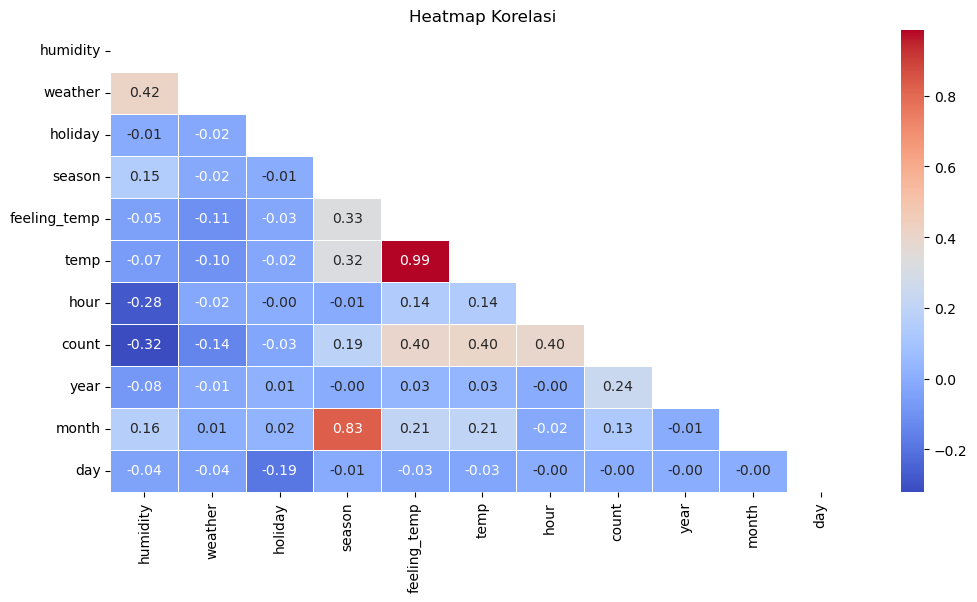

In [15]:
# Hitung korelasi
correlation_matrix = df.corr()
up_triangle = np.triu(df.corr())

# Plot heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True,mask=up_triangle, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# Feature Engineering

In [16]:
# df[['weather','season','month','day','hour']] = df[['weather','season','month','day','hour']].astype('category')

In [17]:
df

,humidity,weather,holiday,season,feeling_temp,temp,hour,count,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,4
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,6
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,2
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,5
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,1
...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,257,2012,1,2
12161,0.62,1,0,3,0.7424,0.78,0,102,2012,7,4
12162,0.60,2,1,1,0.2121,0.24,5,6,2012,2,0
12163,0.77,2,0,2,0.4242,0.42,2,69,2012,3,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12164 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humidity      12164 non-null  float64
 1   weather       12164 non-null  int64  
 2   holiday       12164 non-null  int64  
 3   season        12164 non-null  int64  
 4   feeling_temp  12164 non-null  float64
 5   temp          12164 non-null  float64
 6   hour          12164 non-null  int64  
 7   count         12164 non-null  int64  
 8   year          12164 non-null  int32  
 9   month         12164 non-null  int32  
 10  day           12164 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 997.8 KB


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(df[[i for i in df.describe().columns if i not in ['count']]])

,variables,VIF
0,humidity,16.188475
1,weather,7.451503
2,holiday,1.075556
3,season,20.861719
4,feeling_temp,353.320869
5,temp,311.362402
6,hour,4.222269
7,year,31.597858
8,month,14.822409
9,day,3.417027


In [22]:
calc_vif(df[[i for i in df.describe().columns if i not in ['count','feeling_temp']]])

,variables,VIF
0,humidity,15.970701
1,weather,7.411900
2,holiday,1.074965
3,season,20.823183
4,temp,9.016373
5,hour,4.218216
6,year,30.473216
7,month,14.817739
8,day,3.415753


In [23]:
df_pre = df.copy()

In [24]:
df_pre = df_pre.drop(['feeling_temp','month'], axis=1)

df_pre

,humidity,weather,holiday,season,temp,hour,count,year,day
0,0.62,1,0,4,0.36,16,250,2011,4
1,0.64,1,0,2,0.54,4,18,2012,6
2,0.53,1,0,2,0.62,23,107,2011,2
3,0.87,2,0,2,0.36,8,145,2012,5
4,0.55,1,0,3,0.76,18,857,2012,1
...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.24,7,257,2012,2
12161,0.62,1,0,3,0.78,0,102,2012,4
12162,0.60,2,1,1,0.24,5,6,2012,0
12163,0.77,2,0,2,0.42,2,69,2012,5


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=42)

In [26]:
feature = df_seen.drop('count', axis=1)
target = df_seen['count']

In [61]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9731 entries, 10288 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humidity      9731 non-null   float64
 1   weather       9731 non-null   int64  
 2   holiday       9731 non-null   int64  
 3   season        9731 non-null   int64  
 4   feeling_temp  9731 non-null   float64
 5   temp          9731 non-null   float64
 6   hour          9731 non-null   int64  
 7   year          9731 non-null   int32  
 8   month         9731 non-null   int32  
 9   day           9731 non-null   int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 722.2 KB


In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, 
                                                                          test_size=0.2, random_state=42)

print('feature_train shape:', X_train.shape)
print('target_train shape:', y_train.shape)

feature_train shape: (7784, 10)
target_train shape: (7784,)


In [28]:
X_train.head()

,humidity,weather,holiday,season,feeling_temp,temp,hour,year,month,day
57,0.55,2,0,3,0.6970,0.76,20,2012,6,4
9646,0.42,1,0,1,0.1061,0.12,10,2011,2,3
9307,0.94,2,0,3,0.5455,0.62,3,2012,9,1
4647,0.61,2,0,3,0.6212,0.66,2,2012,7,4
8185,0.77,1,0,2,0.5000,0.52,20,2011,5,6


In [29]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [30]:
class BinaryEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = BinaryEncoder()
        self.feature_names_out = None  # Placeholder for column names
        
    def fit(self, X, y=None):
        self.encoder.fit(X)
        # Save column names after encoding
        self.feature_names_out = self.encoder.transform(X).columns.tolist()
        return self
    
    def transform(self, X):
        return self.encoder.transform(X).values
    
    def get_feature_names_out(self, input_features=None):
        if self.feature_names_out:
            return self.feature_names_out
        return input_features

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7784 entries, 57 to 10858
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humidity      7784 non-null   float64
 1   weather       7784 non-null   int64  
 2   holiday       7784 non-null   int64  
 3   season        7784 non-null   int64  
 4   feeling_temp  7784 non-null   float64
 5   temp          7784 non-null   float64
 6   hour          7784 non-null   int64  
 7   year          7784 non-null   int32  
 8   month         7784 non-null   int32  
 9   day           7784 non-null   int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 577.7 KB


In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        # Lewati scaling untuk fitur yang sudah dinormalisasi
        # ('num', 'passthrough', ['humidity', 'feeling_temp', 'temp','holiday','hour','year']),
        
        # OneHotEncoder untuk fitur kategorikal
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), ['weather', 'season','day','month']),
        ('num', RobustScaler(), ['hour','year']),
        # BinaryEncoder untuk fitur ordinal/kategorikal numerik
    ], remainder='passthrough',verbose_feature_names_out=False
)

In [33]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['weather', 'season', 'day', 'month']),
                                ('num', RobustScaler(), ['hour', 'year'])],
                  verbose_feature_names_out=False)

In [34]:
X_train_pre = preprocessor.transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [35]:
# DataFrame
X_train_pre = pd.DataFrame(X_train_pre, columns=preprocessor.get_feature_names_out())
X_test_pre = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

In [62]:
X_train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784 entries, 0 to 7783
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather_2     7784 non-null   float64
 1   weather_3     7784 non-null   float64
 2   weather_4     7784 non-null   float64
 3   season_2      7784 non-null   float64
 4   season_3      7784 non-null   float64
 5   season_4      7784 non-null   float64
 6   day_1         7784 non-null   float64
 7   day_2         7784 non-null   float64
 8   day_3         7784 non-null   float64
 9   day_4         7784 non-null   float64
 10  day_5         7784 non-null   float64
 11  day_6         7784 non-null   float64
 12  month_2       7784 non-null   float64
 13  month_3       7784 non-null   float64
 14  month_4       7784 non-null   float64
 15  month_5       7784 non-null   float64
 16  month_6       7784 non-null   float64
 17  month_7       7784 non-null   float64
 18  month_8       7784 non-null 

In [37]:
X_train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784 entries, 0 to 7783
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather_2     7784 non-null   float64
 1   weather_3     7784 non-null   float64
 2   weather_4     7784 non-null   float64
 3   season_2      7784 non-null   float64
 4   season_3      7784 non-null   float64
 5   season_4      7784 non-null   float64
 6   day_1         7784 non-null   float64
 7   day_2         7784 non-null   float64
 8   day_3         7784 non-null   float64
 9   day_4         7784 non-null   float64
 10  day_5         7784 non-null   float64
 11  day_6         7784 non-null   float64
 12  month_2       7784 non-null   float64
 13  month_3       7784 non-null   float64
 14  month_4       7784 non-null   float64
 15  month_5       7784 non-null   float64
 16  month_6       7784 non-null   float64
 17  month_7       7784 non-null   float64
 18  month_8       7784 non-null 

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
from sklearn.model_selection import KFold, cross_validate

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, enable_categorical=True),
    "LightGBM": LGBMRegressor(random_state=42)
}

# # Tambahkan metrik scoring
# scoring = {
#     'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
#     'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
#     'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
# }

scorer = [
    "neg_root_mean_squared_error", 
    "neg_mean_absolute_error", 
    "neg_mean_absolute_percentage_error"
    ]

# Benchmarking models
benchmark_results = {}
for idx, model in enumerate(models):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models[model])
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_score = cross_validate(
        estimator=pipeline,
        X = X_train,
        y = y_train,
        cv = cv,
        scoring=scorer,
        error_score='raise',
    )

    benchmark_results[model] = {
        'Mean RMSE': cv_score['test_neg_root_mean_squared_error'].mean(),
        'Std RMSE': cv_score['test_neg_root_mean_squared_error'].std(),
        'Mean MAPE': cv_score['test_neg_mean_absolute_percentage_error'].mean(),
        'Std MAPE': cv_score['test_neg_mean_absolute_percentage_error'].std(),
        'Mean MAE': cv_score['test_neg_mean_absolute_error'].mean(),
        'Std MAE': cv_score['test_neg_mean_absolute_error'].std(),
    }

    
    # scores = cross_validate(model, feature_train, target_train, scoring=scoring, cv=5, return_train_score=True)
    # benchmark_results[name] = {
    #     "Mean RMSE": -np.mean(scores['test_RMSE']),  # Negatif menjadi positif
    #     "Mean MAPE": -np.mean(scores['test_MAPE']),
    #     "Mean MAE": -np.mean(scores['test_MAE'])
    # }

# # Convert benchmark results to DataFrame for analysis
# benchmark_df = pd.DataFrame(benchmark_results).T.sort_values(by="Mean RMSE", ascending=False)

# # Display benchmarking results
# print("\nBenchmarking Results:")
# print(benchmark_df)

# # Visualize results
# plt.figure(figsize=(12, 6))
# plt.barh(benchmark_df.index, benchmark_df["Mean RMSE"], color='lightblue')
# plt.xlabel("Mean RMSE (lower is better)")
# plt.ylabel("Model")
# plt.title("Model Benchmarking (RMSE)")
# plt.gca().invert_yaxis()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.barh(benchmark_df.index, benchmark_df["Mean MAPE"], color='gold')
# plt.xlabel("Mean MAPE (lower is better)")
# plt.ylabel("Model")
# plt.title("Model Benchmarking (MAPE)")
# plt.gca().invert_yaxis()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.barh(benchmark_df.index, benchmark_df["Mean MAE"], color='lightcoral')
# plt.xlabel("Mean MAE (lower is better)")
# plt.ylabel("Model")
# plt.title("Model Benchmarking (MAE)")
# plt.gca().invert_yaxis()
# plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 6227, number of used features: 28
[LightGBM] [Info] Start training from score 188.851453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 6227, number of used features: 28
[LightGBM] [Info] Start training from score 188.220652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [40]:
# Convert benchmark results to DataFrame for analysis
benchmark_df = pd.DataFrame(benchmark_results).T.sort_values(by="Mean RMSE", ascending=False)

# Display benchmarking results
print("\nBenchmarking Results:")
benchmark_df


Benchmarking Results:


,Mean RMSE,Std RMSE,Mean MAPE,Std MAPE,Mean MAE,Std MAE
LightGBM,-45.471593,1.733257,-0.467718,0.037242,-29.627336,0.911190
XGBoost,-45.489115,1.624818,-0.497093,0.046609,-29.627376,1.022230
Random Forest,-52.053166,3.378538,-0.401040,0.036139,-32.455311,1.452068
Decision Tree,-70.760569,2.942338,-0.452221,0.033201,-42.136951,1.445479
Gradient Boosting,-80.260488,2.266612,-1.050292,0.091421,-55.838237,1.525508
Linear Regression,-140.262604,2.638172,-3.425849,0.300379,-105.393635,1.725436
Ridge Regression,-140.263620,2.622405,-3.423557,0.299899,-105.410384,1.710461
Lasso Regression,-141.062584,2.597684,-3.413654,0.324626,-105.568056,1.417295


In [41]:
# transformed target regressor
from sklearn.compose import TransformedTargetRegressor

In [42]:
log_linear = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(Ridge(random_state=42), func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(Lasso(random_state=42), func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(DecisionTreeRegressor(random_state=42), func=np.log, inverse_func=np.exp)
log_forest = TransformedTargetRegressor(RandomForestRegressor(random_state=42), func=np.log, inverse_func=np.exp)
log_gboost = TransformedTargetRegressor(GradientBoostingRegressor(random_state=42), func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(XGBRegressor(random_state=42, categorical_enable=True), func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(LGBMRegressor(random_state=42), func=np.log, inverse_func=np.exp)

models_log = {
    'LinearRegression': log_linear,
    'Ridge': log_ridge,
    'Lasso': log_lasso,
    'DecisionTree': log_tree,
    'RandomForest': log_forest,
    'GradientBoosting': log_gboost,
    'XGBRegressor': log_xgb,
    'LGBMRegressor': log_lgbm
}

benchmark_results1 = {}
for idx, model in enumerate(models_log):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models_log[model])
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=19)

    cv_score = cross_validate(
        estimator=pipeline,
        X = X_train,
        y = y_train,
        cv = cv,
        scoring=scorer,
        error_score='raise',
    )

    benchmark_results1[model] = {
        'Mean RMSE': cv_score['test_neg_root_mean_squared_error'].mean(),
        'Std RMSE': cv_score['test_neg_root_mean_squared_error'].std(),
        'Mean MAPE': cv_score['test_neg_mean_absolute_percentage_error'].mean(),
        'Std MAPE': cv_score['test_neg_mean_absolute_percentage_error'].std(),
        'Mean MAE': cv_score['test_neg_mean_absolute_error'].mean(),
        'Std MAE': cv_score['test_neg_mean_absolute_error'].std(),
    }


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 6227, number of used features: 28
[LightGBM] [Info] Start training from score 4.534702
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 6227, number of used features: 28
[LightGBM] [Info] Start training from score 4.527207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

In [43]:
# Convert benchmark results to DataFrame for analysis
benchmark_df1 = pd.DataFrame(benchmark_results1).T.sort_values(by="Mean RMSE", ascending=False)

# Display benchmarking results
print("\nBenchmarking Results:")
benchmark_df1


Benchmarking Results:


,Mean RMSE,Std RMSE,Mean MAPE,Std MAPE,Mean MAE,Std MAE
XGBRegressor,-47.071854,1.826528,-0.278688,0.007422,-28.799245,0.832649
LGBMRegressor,-48.567829,2.140715,-0.280086,0.010074,-29.997069,0.844089
RandomForest,-52.078680,1.290285,-0.318979,0.014437,-31.734947,0.928490
DecisionTree,-68.540866,2.797402,-0.441526,0.009216,-41.435108,1.739888
GradientBoosting,-89.212313,1.724919,-0.480215,0.033635,-56.540187,1.244002
Ridge,-160.621994,3.151437,-1.382119,0.077766,-105.686887,2.431861
LinearRegression,-160.654729,3.140388,-1.380702,0.078121,-105.671381,2.422153
Lasso,-205.011661,3.102482,-3.820472,0.217405,-143.790826,1.560748


In [44]:
from statsmodels.tools.eval_measures import rmse

In [45]:
# Benchmark 3 model terbaik
best_models = {"XGB": log_xgb}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in best_models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('model', best_models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(rmse(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [46]:
score_before_tuning = pd.DataFrame(
    {
        "RMSE": score_rmse,
        "MAE": score_mae,
        "MAPE": score_mape
    },
    index=best_models.keys()
)

score_before_tuning

,RMSE,MAE,MAPE
XGB,49.742305,28.186644,0.255114


In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [48]:
hyperparam = {
    "modeling__regressor__max_depth": list(np.arange(1, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.1, 1, 0.1).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 501, 10)),
    # "modeling__regressor__subsample": list(np.arange(1, 11)/10),
    "modeling__regressor__gamma": list(np.arange(0, 11)),
    # "modeling__regressor__colsample_bytree": list(np.arange(1, 10)/10),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 3, 7))
}


pipe_model = Pipeline([
        ("preprocessing", preprocessor),
        ("modeling", log_xgb)
    ]) 

random_xgb = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam,
    n_iter = 1000,
    cv = cv,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['weather',
                                                                                'season',
                                                                                'day',
                                                                                'month']),
                                                                              ('num',
                                                                               RobustScaler(),
                                                                               ['hour',
                                                                                'year'])],
                                                                verbose_feature_names_out=False)),
                                             ('modeling',
                                              T...
                                                                              np.int64(360),
                                                                              np.int64(370),
                                                                              np.int64(380),
                                                                              np.int64(390), ...],
                                        'modeling__regressor__reg_alpha': [np.float64(0.001),
                                                                           np.float64(0.01),
                                                                           np.float64(0.1),
                                                                           np.float64(1.0),
                                                                           np.float64(10.0),
                                                                           np.float64(100.0),
                                                                           np.float64(1000.0)]},
                   refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [49]:
random_xgb.best_params_

{'modeling__regressor__reg_alpha': np.float64(0.1),
 'modeling__regressor__n_estimators': np.int64(430),
 'modeling__regressor__max_depth': np.int64(6),
 'modeling__regressor__learning_rate': np.float64(0.1),
 'modeling__regressor__gamma': np.int64(0)}

In [50]:
random_xgb.best_score_

np.float64(-43.40356698098828)

In [51]:
# Model XGBoost
xgb_model = {"XGB_1" : log_xgb}

# Define model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning = rmse(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_1 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning, 
    "MAE": mae_xgb_tuning, 
    "MAPE": mape_xgb_tuning
    },
    index=xgb_model.keys()
)

score_after_tuning_1

,RMSE,MAE,MAPE
XGB_1,44.716242,26.038517,0.23881


In [52]:
hyper_1 = pd.concat([score_before_tuning, score_after_tuning_1], axis=0)
hyper_1

,RMSE,MAE,MAPE
XGB,49.742305,28.186644,0.255114
XGB_1,44.716242,26.038517,0.238810


In [53]:
hyperparam_2 = {
    "modeling__regressor__max_depth": list(np.arange(6, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.01, 0.31, 0.05).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 701, 50)),
    # "modeling__regressor__subsample": list(np.arange(0.01, 0.31, 0.01).round(2)),
    # "modeling__regressor__colsample_bytree": list(np.arange(0.5, 1.0, 0.1).round(2)),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 1, 5))
}

pipe_model_2 = Pipeline([
        ("preprocessing", preprocessor),
        ("modeling", log_xgb)
    ]) 

cv_2 = KFold(n_splits=5, shuffle=True, random_state=0)

random_xgb_2 = RandomizedSearchCV(
    estimator = pipe_model_2,
    param_distributions = hyperparam_2,
    n_iter = 1000,
    cv = cv_2,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb_2.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['weather',
                                                                                'season',
                                                                                'day',
                                                                                'month']),
                                                                              ('num',
                                                                               RobustScaler(),
                                                                               ['hour',
                                                                                'year'])],
                                                                verbose_feature_names_out=False)),
                                             ('modeling',
                                              Tr...
                                                                              np.int64(400),
                                                                              np.int64(450),
                                                                              np.int64(500),
                                                                              np.int64(550),
                                                                              np.int64(600),
                                                                              np.int64(650),
                                                                              np.int64(700)],
                                        'modeling__regressor__reg_alpha': [np.float64(0.001),
                                                                           np.float64(0.01),
                                                                           np.float64(0.1),
                                                                           np.float64(1.0),
                                                                           np.float64(10.0)]},
                   refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [54]:
# Model XGBoost
xgb_model = {"XGB_2" : log_xgb}

# Define model with the best estimator
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning_2 = rmse(y_test, y_pred_xgb_tuning_2)
mae_xgb_tuning_2 = mean_absolute_error(y_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_2)

score_after_tuning_2 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning_2, 
    "MAE": mae_xgb_tuning_2, 
    "MAPE": mape_xgb_tuning_2
    },
    index=xgb_model.keys()
)

score_after_tuning_2

,RMSE,MAE,MAPE
XGB_2,45.997113,27.026353,0.243288


In [55]:
hyper_2 = pd.concat([hyper_1, score_after_tuning_2], axis=0)
hyper_2

,RMSE,MAE,MAPE
XGB,49.742305,28.186644,0.255114
XGB_1,44.716242,26.038517,0.238810
XGB_2,45.997113,27.026353,0.243288


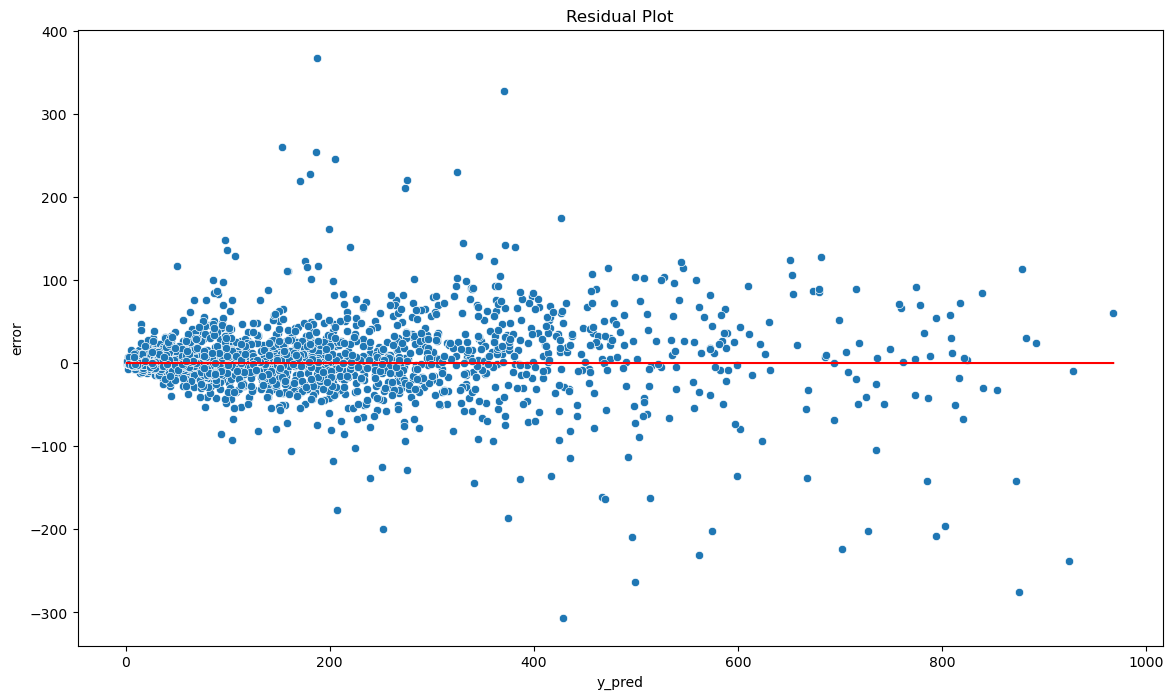

In [56]:
df_error = pd.DataFrame({
    'y_pred':y_pred,
    'error': (y_test - y_pred_xgb_tuning)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

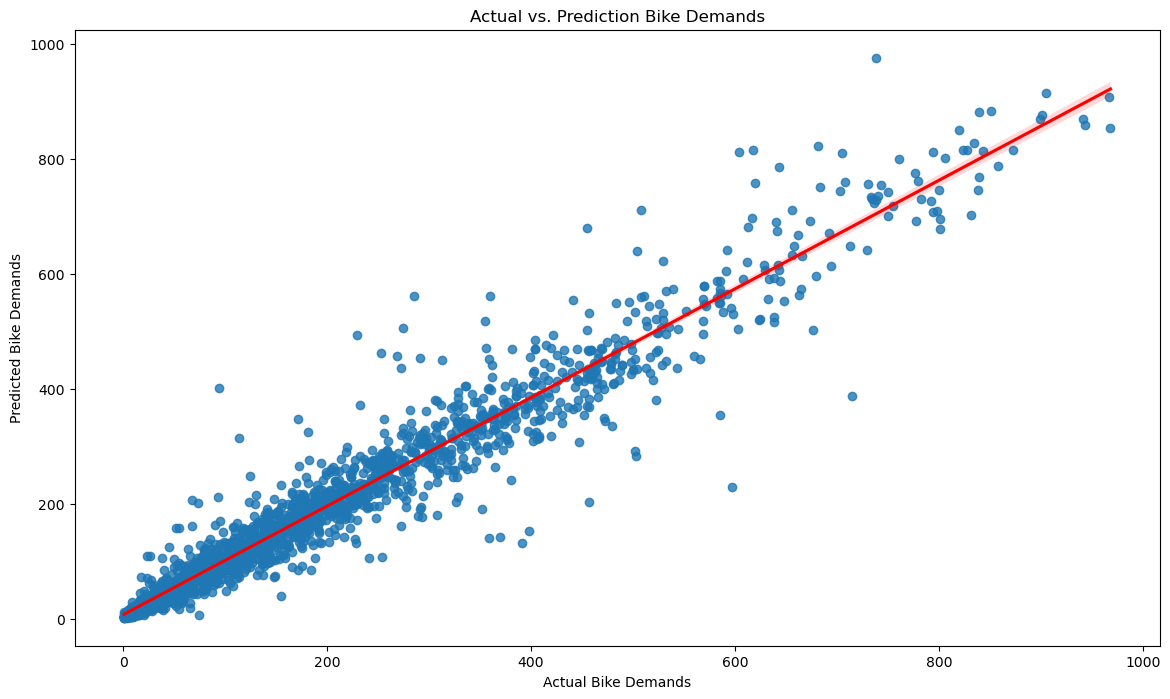

In [57]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning, line_kws={"color": "red"}).set(title="Actual vs. Prediction Bike Demands", 
                                               xlabel="Actual Bike Demands", 
                                               ylabel="Predicted Bike Demands")

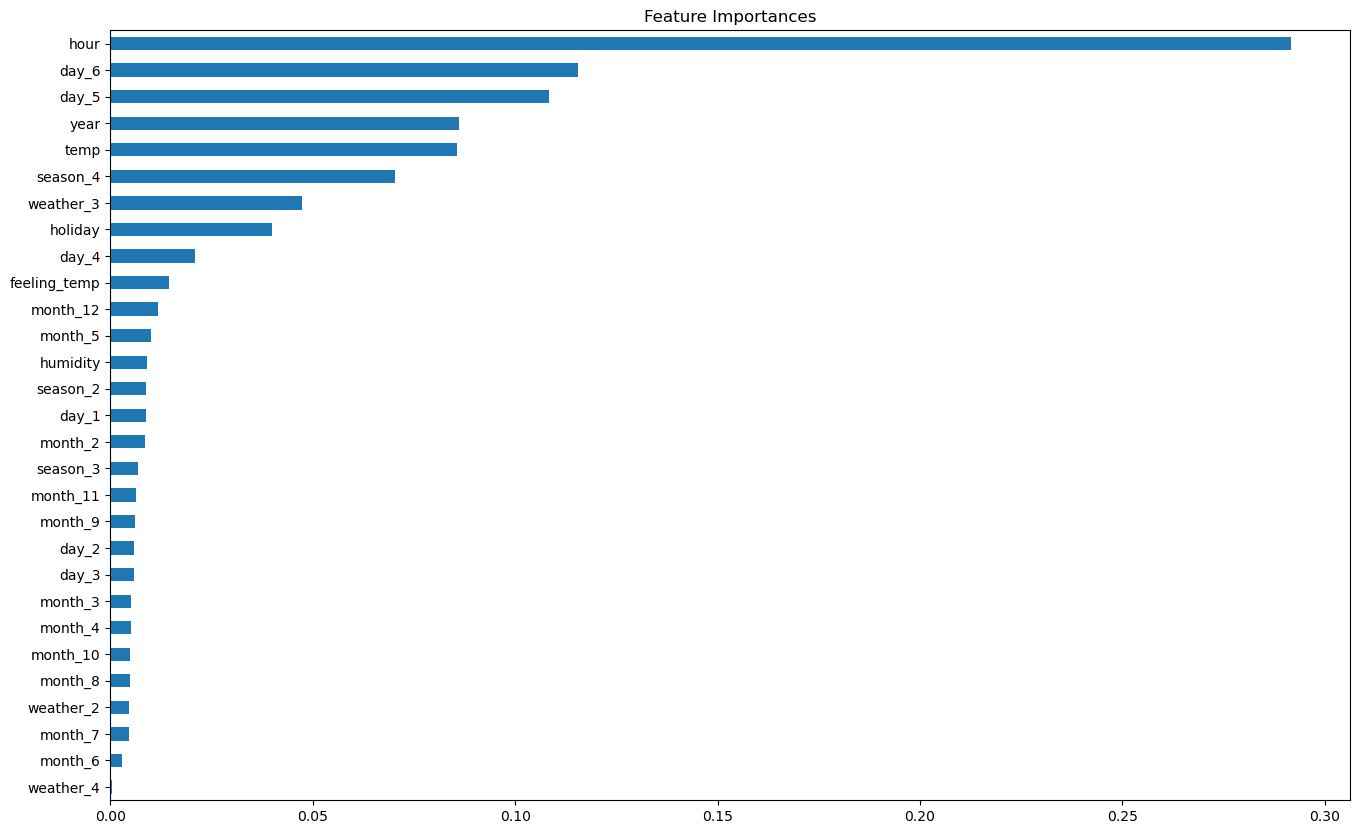

In [58]:
# Access the underlying model from TransformedTargetRegressor
underlying_model = xgb_tuning["modeling"].regressor_

feature_names = preprocessor.get_feature_names_out()
    
# Create a Series of feature importances
feature_imp = pd.Series(underlying_model.feature_importances_, index=feature_names).sort_values(ascending=False)
    
# Plot the feature importances
plt.figure(figsize=(16,10))
feature_imp.sort_values().plot(kind="barh", title="Feature Importances");

In [59]:
import shap

col_names=random_xgb.best_estimator_[0].get_feature_names_out()

best_model = random_xgb.best_estimator_["modeling"].regressor_

data = pd.DataFrame(random_xgb.best_estimator_[0].fit_transform(X_train), columns=col_names)

100%|===================| 7772/7784 [04:29<00:00]        

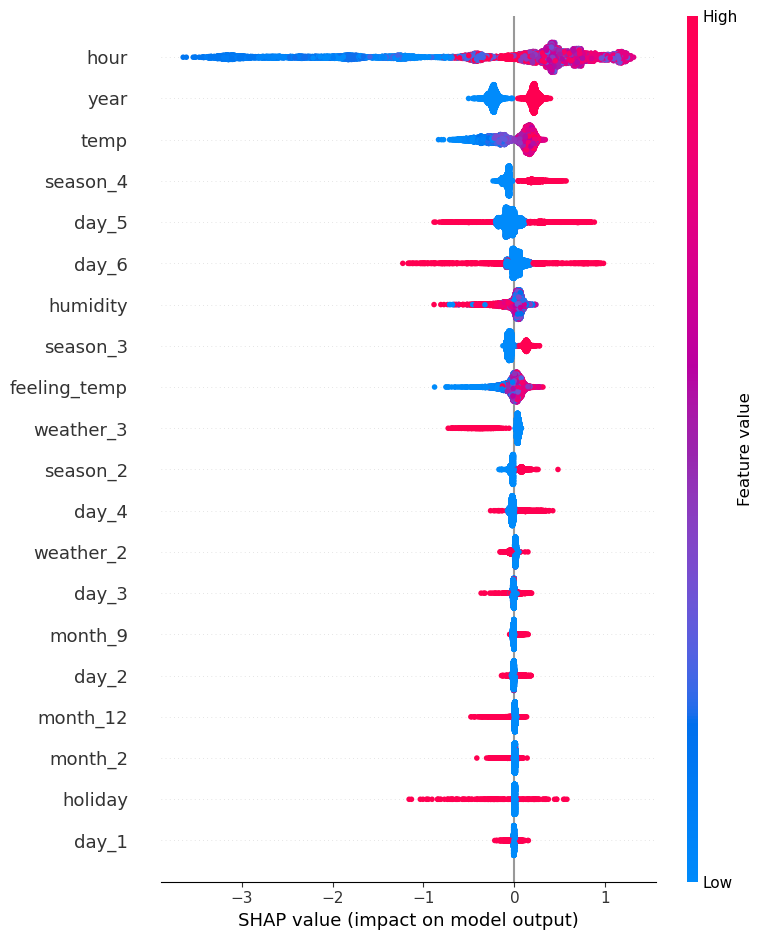

In [60]:
# define explainer
explainer = shap.TreeExplainer(
    best_model,
    data = data  
)

# count shap value for every rows in the train data
shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data, feature_names = feature_names)